# DTSA-5509 Final Project: Exploring Happiness

**Genesis Zhong**  

**June 25th, 2023**  

https://github.com/genesischung/predicting_happiness

# Introduction

I have always been fascinated by the application of statistics and machine learning in the field of social science. Particularly, I am intrigued by the concept of happiness. Happiness has been discussed and studied in a wide variety of scientific disciplines. Many great philosophers have attempted to explain happiness and its true meaning. As an engineering student, I am more interested in research that attempts to find the contributing factors to happiness.

Tianchi is a platform similar to kaggle, offered by Alibaba Cloud. It hosts a project which uses the Chinese General Social Survey (CGSS) data to build machine learning models in attempt to predict happiness. The link is provided here: [Mining Happiness](https://tianchi.aliyun.com/competition/entrance/231702/information)

I have previously worked on this data set in my data mining class. Unfortunately, my knowledge and understanding of machine learning was quite limited at the time and I was not able to get any good result. Now that I have completed the first course in the machine learning specialization, I decided to apply what I have learned to challenge this project again.  

# Problem Description

The Chinese General Social Survey (CGSS) was launched in 2003 by Renmin University and the Hong Kong University of Science and Technology, inspired by the popular General Social Survey (GSS) in the United States. It records responses to a social survey containing a wide variety of social-economic questions, including but not limited to personal information, family information, and attitudes towards the society. 

The objective for this project is to train machine learning models on the CGSS data set in attempt to predict happiness from various social-economic variables. Governments and corporations can use the findings from this project to improve people's happiness, which very well could have positive implications on people's well-being, quality of life, and work productivity.

Tianchi hosts a copy of the 2015 CGSS data set, which will be used for this project. My plan is to first build a logistic regression model to establish a baseline performance. Then I will try Decision Tree, KNN, AdaBoost, and Random Forest. The model performance will be evaluated by the Mean Squared Error.

# Importing Data Set and Data Cleansing

First I import the data set and check out what columns are in the data set and their data types. This is so that I can have a better idea of how to perform data cleansing and pre-processing.

I noticed that three columns with "other" in their names are meant for additional comments which will not help for modeling. So I decided to remove these three columns. I have also removed the `survey_time` column, which contains no useful information for modeling.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('./data/happiness_train_complete.csv', encoding='gbk', parse_dates=['survey_time'])

# check out what columns are in the data set
# and the data type of each column
for col in df.columns:
    print(col, df[col].dtypes)
    
df = df.drop(columns=['edu_other', 'invest_other', 'survey_time', 'property_other'])

id int64
happiness int64
survey_type int64
province int64
city int64
county int64
gender int64
birth int64
nationality int64
religion int64
religion_freq int64
edu int64
edu_status float64
edu_yr float64
income int64
political int64
join_party float64
floor_area float64
property_0 int64
property_1 int64
property_2 int64
property_3 int64
property_4 int64
property_5 int64
property_6 int64
property_7 int64
property_8 int64
height_cm int64
weight_jin int64
health int64
health_problem int64
depression int64
hukou int64
hukou_loc float64
media_1 int64
media_2 int64
media_3 int64
media_4 int64
media_5 int64
media_6 int64
leisure_1 int64
leisure_2 int64
leisure_3 int64
leisure_4 int64
leisure_5 int64
leisure_6 int64
leisure_7 int64
leisure_8 int64
leisure_9 int64
leisure_10 int64
leisure_11 int64
leisure_12 int64
socialize int64
relax int64
learn int64
social_neighbor float64
social_friend float64
socia_outing int64
equity int64
class int64
class_10_before int64
class_10_after int64
class_14 i

The next step is to fill the missing values in the data set.

I wrote a function to show the columns with missing values, so I can proceed filling them accordingly.

In [2]:
# find columns with missing values
def missing_columns(df):
    df_na = df.isnull().sum().sort_values()
    df_na  = df_na[df_na != 0]
    print(df_na)

missing_columns(df)

family_income         1
hukou_loc             4
social_neighbor     796
social_friend       796
marital_1st         828
minor_child        1066
edu_status         1120
s_income           1718
s_hukou            1718
s_edu              1718
s_birth            1718
s_work_exper       1718
s_political        1718
marital_now        1770
edu_yr             1972
work_manage        5049
work_type          5049
work_yr            5049
work_status        5049
s_work_type        5435
s_work_status      5435
join_party         7176
dtype: int64


In [3]:
# fill family_income with sample mean
df['family_income'] = df['family_income'].fillna(df['family_income'].mean())
missing_columns(df)

hukou_loc             4
social_neighbor     796
social_friend       796
marital_1st         828
minor_child        1066
edu_status         1120
s_income           1718
s_hukou            1718
s_edu              1718
s_birth            1718
s_work_exper       1718
s_political        1718
marital_now        1770
edu_yr             1972
work_manage        5049
work_type          5049
work_yr            5049
work_status        5049
s_work_type        5435
s_work_status      5435
join_party         7176
dtype: int64


In [4]:
# fill hukou_loc
# 4 = undetermined
df['hukou_loc'] = df['hukou_loc'].fillna(4)
missing_columns(df)

social_friend       796
social_neighbor     796
marital_1st         828
minor_child        1066
edu_status         1120
s_birth            1718
s_work_exper       1718
s_income           1718
s_hukou            1718
s_edu              1718
s_political        1718
marital_now        1770
edu_yr             1972
work_manage        5049
work_type          5049
work_yr            5049
work_status        5049
s_work_type        5435
s_work_status      5435
join_party         7176
dtype: int64


In [5]:
# fill social_neighbor and social_friend
# 7 = never, because socialize=1 means never
df['social_neighbor'] = df['social_neighbor'].fillna(7)
df['social_friend'] = df['social_friend'].fillna(7)
missing_columns(df)

marital_1st       828
minor_child      1066
edu_status       1120
s_birth          1718
s_work_exper     1718
s_income         1718
s_hukou          1718
s_edu            1718
s_political      1718
marital_now      1770
edu_yr           1972
work_manage      5049
work_type        5049
work_yr          5049
work_status      5049
s_work_type      5435
s_work_status    5435
join_party       7176
dtype: int64


In [6]:
df['marital_1st'].value_counts()


marital_1st
-2.0       452
 1990.0    208
 1982.0    195
 1980.0    194
 1985.0    191
          ... 
 1944.0      2
 1942.0      2
 1940.0      2
 1935.0      1
 1939.0      1
Name: count, Length: 81, dtype: int64

In [7]:
# fill marital_1st
# -2.0 =they are never marries
df['marital_1st'] = df['marital_1st'].fillna(-2.0)
missing_columns(df)

minor_child      1066
edu_status       1120
s_hukou          1718
s_birth          1718
s_work_exper     1718
s_income         1718
s_political      1718
s_edu            1718
marital_now      1770
edu_yr           1972
work_manage      5049
work_type        5049
work_yr          5049
work_status      5049
s_work_type      5435
s_work_status    5435
join_party       7176
dtype: int64


In [8]:
# the rest columms can be filled with 0
df = df.fillna(0)

In [9]:
df.happiness.value_counts()

happiness
 4    4818
 5    1410
 3    1159
 2     497
 1     104
-8      12
Name: count, dtype: int64

In [10]:
# happiness = -8 is not valid
# drop these rows
df = df.drop(index=df[df.happiness==-8].index)
df.happiness.value_counts()

happiness
4    4818
5    1410
3    1159
2     497
1     104
Name: count, dtype: int64

In [11]:
# normalize all negative values to 0
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        df[col] = df[col].apply(lambda x : x if x > 0 else 0)

# Exploratory Data Analysis

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

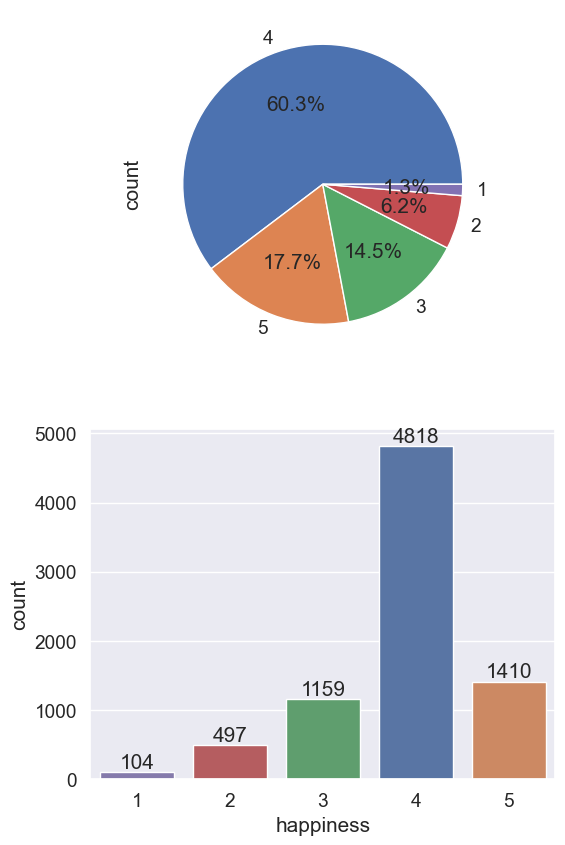

In [13]:
# look at the distribution of happiness
fig = plt.figure(figsize=(6, 10))
sns.set(font_scale=1.25)
plt.subplot(2, 1, 1)
df['happiness'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(2, 1, 2)
colors = ['#8172b3', '#c44e52', '#55a868', '#4c72b0', '#dd8452']
cp = sns.set_palette(sns.color_palette(colors))
ax = sns.countplot(data=df, x='happiness')
for label in ax.containers:
        ax.bar_label(label)

After getting some idea of the distribution of happiness, I wanted to look at how other features in the data set correlate or associate with happiness. So I made a series of plots showing happiness against other features with some of the highest correlation.

In [14]:
df.corrwith(df.happiness, numeric_only=True)\
                .sort_values()[133::-1]

depression         0.326535
family_status      0.294905
class              0.293931
equity             0.282089
health             0.250215
                     ...   
leisure_6         -0.117794
car               -0.118968
leisure_9         -0.155004
status_3_before   -0.162487
status_peer       -0.257494
Length: 134, dtype: float64

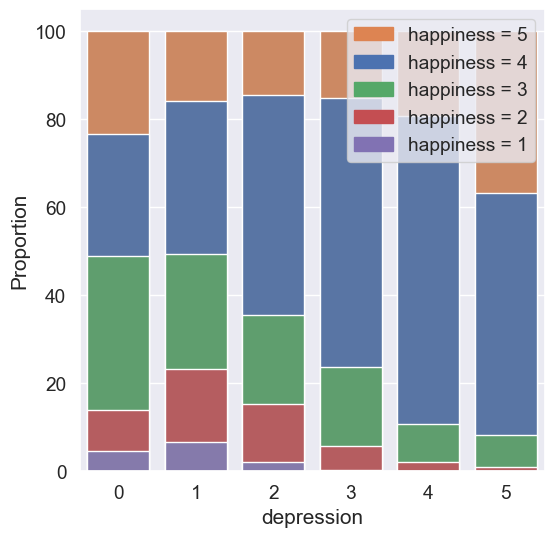

In [15]:
def happiness_by_depression():
    fig = plt.figure(figsize=(6, 6))
    total = df.groupby('depression')['happiness'].sum().reset_index()
    h1 = df[df.happiness == 1].groupby('depression')['happiness'].sum().reset_index()
    h2 = df[df.happiness == 2].groupby('depression')['happiness'].sum().reset_index()
    h3 = df[df.happiness == 3].groupby('depression')['happiness'].sum().reset_index()
    h4 = df[df.happiness == 4].groupby('depression')['happiness'].sum().reset_index()
 
    for h in (h1, h2, h3, h4):
        h['happiness'] = [i / j * 100 for i, j in zip(h['happiness'], total['happiness'])]
        
    total['happiness'] = [i / j * 100 for i, j in zip(total['happiness'], total['happiness'])]
    
    h2.happiness = h2.happiness + h1.happiness
    h3.happiness = h3.happiness + h2.happiness
    h4.happiness = h4.happiness + h3.happiness
    
    bar5 = sns.barplot(x="depression", y="happiness", data=total, color='#dd8452')
    bar4 = sns.barplot(x="depression", y="happiness", data=h4, color='#4c72b0')
    bar3 = sns.barplot(x="depression", y="happiness", data=h3, color='#55a868')
    bar2 = sns.barplot(x="depression", y="happiness", data=h2, color='#c44e52')
    bar1 = sns.barplot(x="depression", y="happiness", data=h1, color='#8172b3')
    
    l5 = mpatches.Patch(color='#dd8452', label='happiness = 5')
    l4 = mpatches.Patch(color='#4c72b0', label='happiness = 4')
    l3 = mpatches.Patch(color='#55a868', label='happiness = 3')
    l2 = mpatches.Patch(color='#c44e52', label='happiness = 2')
    l1 = mpatches.Patch(color='#8172b3', label='happiness = 1')
    
    plt.legend(handles=[l5, l4, l3, l2, l1])
    plt.ylabel('Proportion')
    
    
happiness_by_depression()

In [16]:
df.family_status.value_counts()

family_status
3    4268
2    2570
4     662
1     427
0      42
5      19
Name: count, dtype: int64

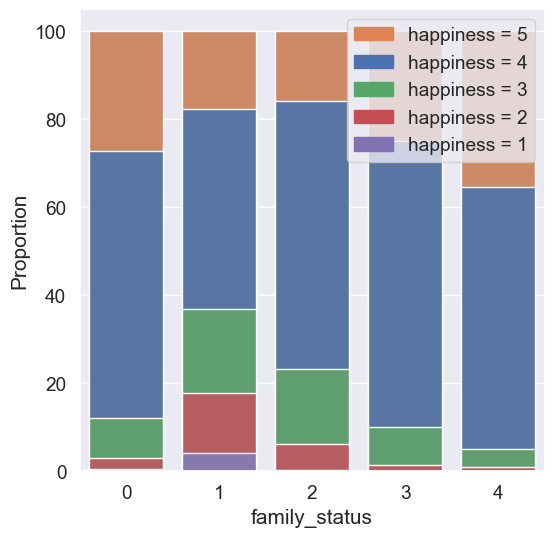

In [17]:
def happiness_by_family_status():
    fig = plt.figure(figsize=(6, 6))
    total = df.groupby('family_status')['happiness'].sum().reset_index()
    h1 = df[df.happiness == 1].groupby('family_status')['happiness'].sum().reset_index()
    h2 = df[df.happiness == 2].groupby('family_status')['happiness'].sum().reset_index()
    h3 = df[df.happiness == 3].groupby('family_status')['happiness'].sum().reset_index()
    h4 = df[df.happiness == 4].groupby('family_status')['happiness'].sum().reset_index()
 
    for h in (h1, h2, h3, h4):
        h['happiness'] = [i / j * 100 for i, j in zip(h['happiness'], total['happiness'])]
        
    total['happiness'] = [i / j * 100 for i, j in zip(total['happiness'], total['happiness'])]
    
    h2.happiness = h2.happiness + h1.happiness
    h3.happiness = h3.happiness + h2.happiness
    h4.happiness = h4.happiness + h3.happiness
    
    bar5 = sns.barplot(x="family_status", y="happiness", data=total, color='#dd8452')
    bar4 = sns.barplot(x="family_status", y="happiness", data=h4, color='#4c72b0')
    bar3 = sns.barplot(x="family_status", y="happiness", data=h3, color='#55a868')
    bar2 = sns.barplot(x="family_status", y="happiness", data=h2, color='#c44e52')
    bar1 = sns.barplot(x="family_status", y="happiness", data=h1, color='#8172b3')
    
    l5 = mpatches.Patch(color='#dd8452', label='happiness = 5')
    l4 = mpatches.Patch(color='#4c72b0', label='happiness = 4')
    l3 = mpatches.Patch(color='#55a868', label='happiness = 3')
    l2 = mpatches.Patch(color='#c44e52', label='happiness = 2')
    l1 = mpatches.Patch(color='#8172b3', label='happiness = 1')
        
    plt.legend(handles=[l5, l4, l3, l2, l1])
    plt.ylabel('Proportion')

happiness_by_family_status()


In [18]:
def happiness_by_feature(feature, show_zero=False):
    fig = plt.figure(figsize=(6, 6))
    total = df.groupby(feature)['happiness'].sum().reset_index()
    h1 = df[df.happiness == 1].groupby(feature)['happiness'].sum().reset_index()
    h2 = df[df.happiness == 2].groupby(feature)['happiness'].sum().reset_index()
    h3 = df[df.happiness == 3].groupby(feature)['happiness'].sum().reset_index()
    h4 = df[df.happiness == 4].groupby(feature)['happiness'].sum().reset_index()
 
    for h in (h1, h2, h3, h4):
        h['happiness'] = [i / j * 100 for i, j in zip(h['happiness'], total['happiness'])]
        
    total['happiness'] = [i / j * 100 for i, j in zip(total['happiness'], total['happiness'])]
    
    h2.happiness = h2.happiness + h1.happiness
    h3.happiness = h3.happiness + h2.happiness
    h4.happiness = h4.happiness + h3.happiness
    
    if show_zero is False:
        for h in (total, h1, h2, h3, h4):
            if h[feature][0] == 0:
                h.drop(index=0, axis=0, inplace=True)

    bar5 = sns.barplot(x=feature, y="happiness", data=total, color='#dd8452')
    bar4 = sns.barplot(x=feature, y="happiness", data=h4, color='#4c72b0')
    bar3 = sns.barplot(x=feature, y="happiness", data=h3, color='#55a868')
    bar2 = sns.barplot(x=feature, y="happiness", data=h2, color='#c44e52')
    bar1 = sns.barplot(x=feature, y="happiness", data=h1, color='#8172b3')
    
    l5 = mpatches.Patch(color='#dd8452', label='happiness = 5')
    l4 = mpatches.Patch(color='#4c72b0', label='happiness = 4')
    l3 = mpatches.Patch(color='#55a868', label='happiness = 3')
    l2 = mpatches.Patch(color='#c44e52', label='happiness = 2')
    l1 = mpatches.Patch(color='#8172b3', label='happiness = 1')
    
        
    plt.legend(handles=[l5, l4, l3, l2, l1])
    plt.ylabel('Proportion')

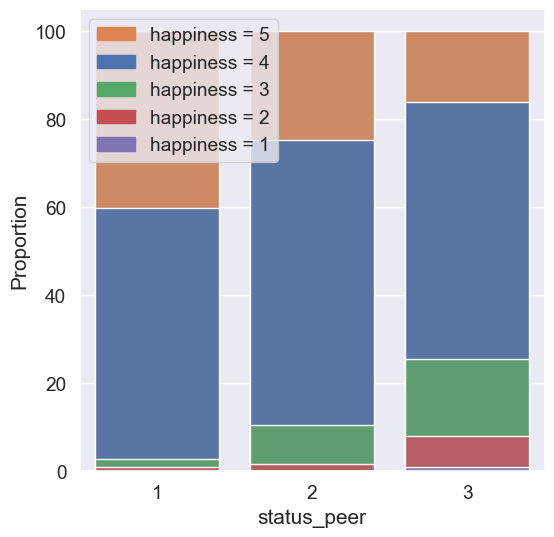

In [19]:
happiness_by_feature("status_peer")

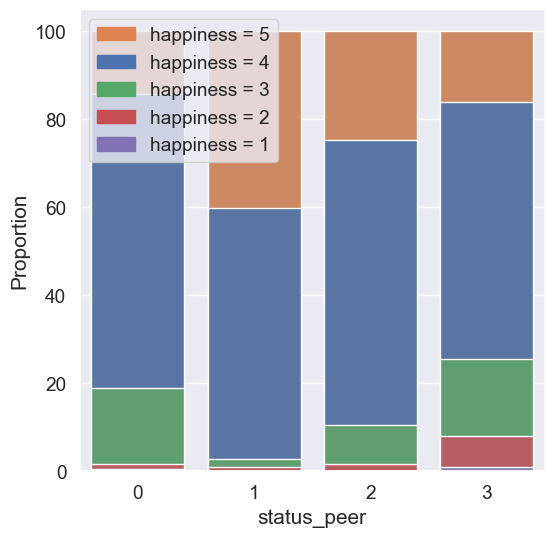

In [20]:
happiness_by_feature("status_peer", True)

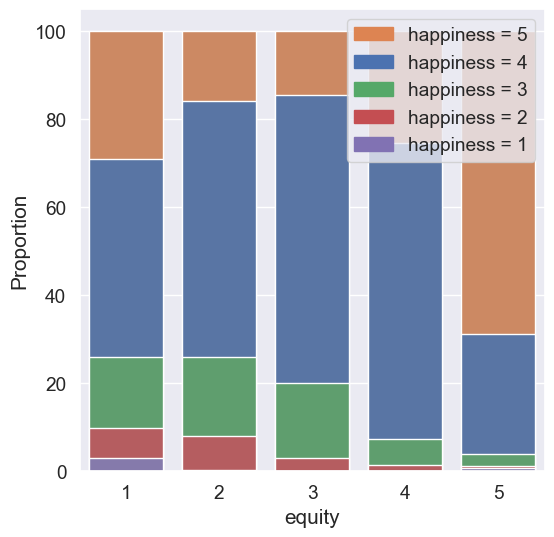

In [21]:
happiness_by_feature("equity")

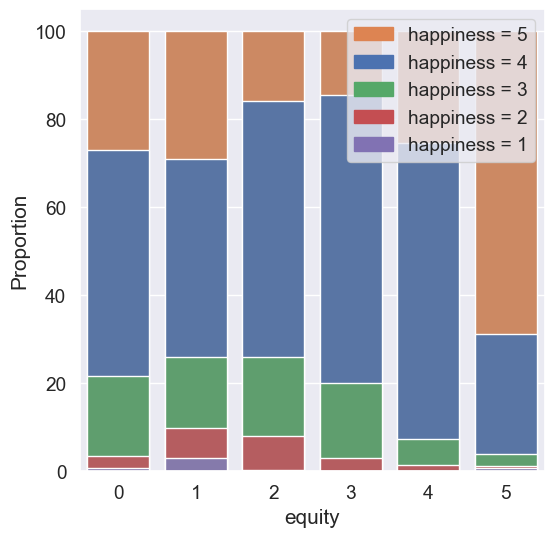

In [22]:
happiness_by_feature("equity", True)

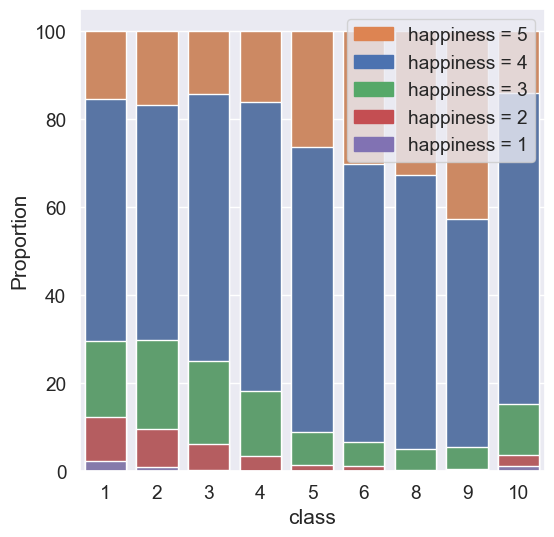

In [23]:
happiness_by_feature("class")

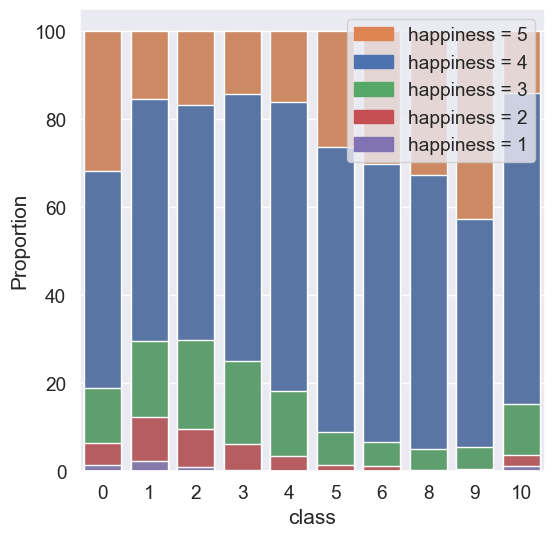

In [24]:
happiness_by_feature("class", True)

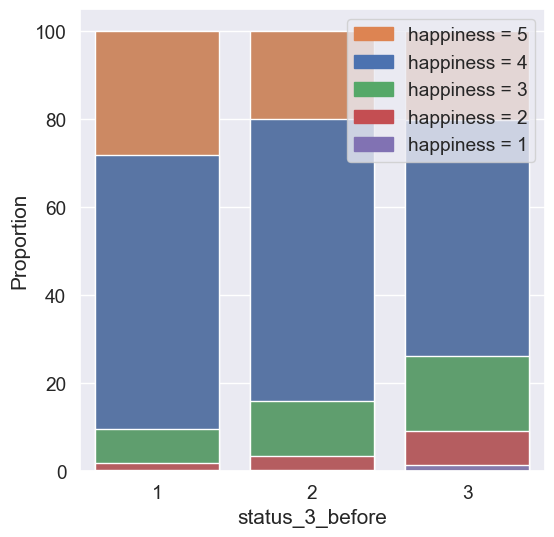

In [25]:
happiness_by_feature("status_3_before")

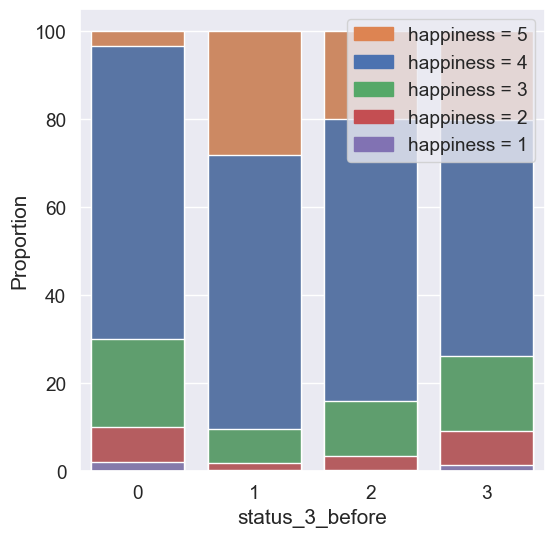

In [26]:
happiness_by_feature("status_3_before", True)

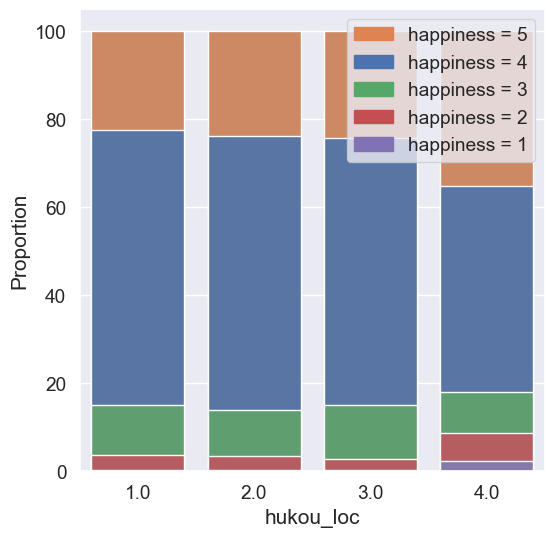

In [27]:
happiness_by_feature("hukou_loc")

There is another type of answers in the survey, which is a score from 0 to 100. In this case, it is easier to show the distribution of the score for each level of happiness, which is why I made these plots below.

<Figure size 600x600 with 0 Axes>

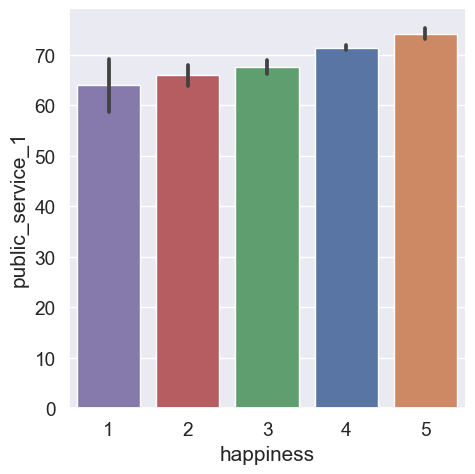

In [28]:
def happiness_by_score(feature):
    fig = plt.figure(figsize=(6, 6))
    sns.catplot(x='happiness', y=feature, data=df, kind='bar', errorbar=("ci", 95))

happiness_by_score('public_service_1')

<Figure size 600x600 with 0 Axes>

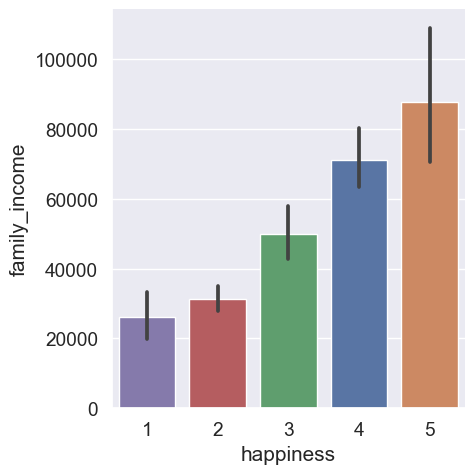

In [29]:
happiness_by_score('family_income')

<Figure size 600x600 with 0 Axes>

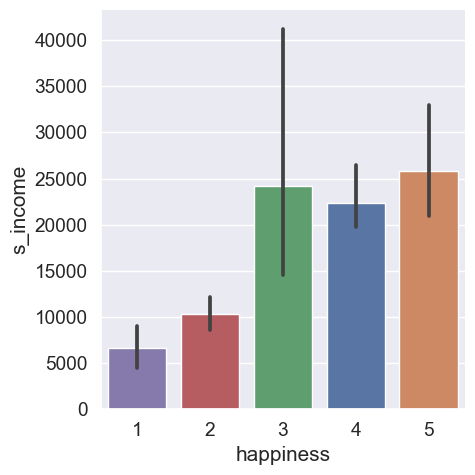

In [30]:
happiness_by_score('s_income')

<Figure size 600x600 with 0 Axes>

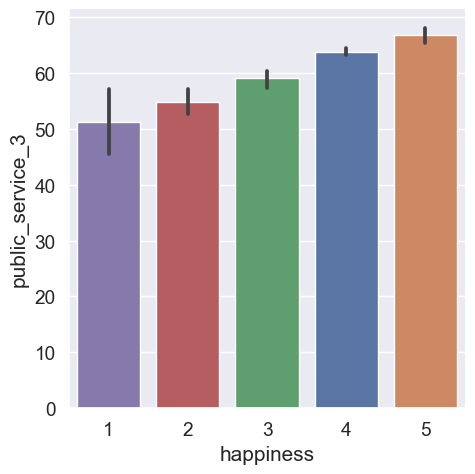

In [31]:
happiness_by_score('public_service_3')

After exploratory data analysis, I am more confident that the features in the data set can be used to predict happiness. 

# Model Building and Evaluation

Since our data set is not exactly very big, I decided to use K-fold Cross-validation provided by `sklearn.model_selection.KFold`. More specifically, I will do a 10-fold cross-validation and evaluate the model performance by the mean Mean Squared Error (MSE) across the 10 folds.

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [33]:
# prepare data set
x = df.drop(columns=['happiness'])
y = df['happiness']

In [34]:
def Logistic_Regression(lr=LogisticRegression(solver='liblinear', random_state=2023), verbose=False):
    kf = KFold(10, shuffle=True, random_state=2023)
    
    mse = []
    
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = lr.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    if verbose:
        print(lr.get_params())
        print("MSE:")
        print(mse)
        
    print("Mean MSE: {}".format(np.mean(mse)))


In [35]:
Logistic_Regression()

C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Mean MSE: 0.6791474932638228


C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [36]:
# experiment with different solvers
Logistic_Regression(lr=LogisticRegression(solver='newton-cg', random_state=2023, n_jobs=-1))

Mean MSE: 0.688662049366219


In [37]:
Logistic_Regression(lr=LogisticRegression(solver='lbfgs', random_state=2023, n_jobs=-1))

Mean MSE: 0.6899136138217885


In [38]:
Logistic_Regression(lr=LogisticRegression(solver='saga', random_state=2023, n_jobs=-1))

C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Mean MSE: 0.6876603272888102


C:\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The best performance I get for Logistic Regresison model is from the one running liblinear solver, and it gets a mean MSE of $0.679$. This is actually not a bad number as the baseline. In my previous attempt at this project, the MSE I got from a Logistic Regression model was about $1.2$. It clearly shows that data cleansing and preprocessing has a significant impact on the results of model performance as well.

## Decision Tree

In [39]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

def Decision_Tree(dtclf=DecisionTreeRegressor(), verbose=False):
    kf = KFold(10, shuffle=True, random_state=2023)

    mse = []
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = dtclf.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    print("max_depth = ", n)
    
    if (verbose):
        print(dtclf.get_params())   
        print("MSE: {}")
        print(mse)
        
    print("Mean MSE: {}".format(np.mean(mse)))
    

In [40]:
for n in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    Decision_Tree(DecisionTreeRegressor(max_depth=n, random_state=2023))
    print()

max_depth =  1
Mean MSE: 0.6268831963168033

max_depth =  2
Mean MSE: 0.587327570875441

max_depth =  3
Mean MSE: 0.5546564418421751

max_depth =  4
Mean MSE: 0.5404825888595857

max_depth =  5
Mean MSE: 0.5396143032907847

max_depth =  6
Mean MSE: 0.5592182424609069

max_depth =  7
Mean MSE: 0.5874649060568963

max_depth =  8
Mean MSE: 0.6224673643331344

max_depth =  9
Mean MSE: 0.6681454430395913

max_depth =  10
Mean MSE: 0.7172023671766223



In [41]:
Decision_Tree(DecisionTreeRegressor(max_depth=5, max_features="sqrt"))

max_depth =  10
Mean MSE: 0.5995900027969668


In [42]:
Decision_Tree(DecisionTreeRegressor(max_depth=5, max_features="log2"))

max_depth =  10
Mean MSE: 0.6006264384376553


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

params = [{'max_depth':[1, 3, 5, 7, 9],
           'max_features':[None, 'sqrt', 'log2']}]
gs_dt = GridSearchCV(DecisionTreeRegressor(),
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     cv=10)
gs_dt.fit(x_train, y_train)
print(gs_dt.best_params_)
gs_dt.score(x_test, y_test)

{'max_depth': 3, 'max_features': None}


-0.5460002421788421

I first exprimented with a Decision Tree model. Finding the most appropriate `max_depth` is essentially to the performance of Decision Tree, so I experimented with every `max_depth` from $1$ to $10$. The model with a `max_depth` of $5$ has the lowest mean MSE of approximately $0.5396$ across the 10 folds. 

I then wanted to see if applying different values of `max_features` can improve the model performance, and I got higher mean MSE for `max_features` of `sqrt` and `log2`. 

To confirm that using all the features yields the best results, I use GridSearchCV to test other `max_depth` values with three `max_features` values. The best parameters I got from the parameter search uses all the features, so the model with a `max_depth` of $5$ is still the best performing Decision Tree model. Nonetheless, it is still significantly better than the best Logistic Regression model we trained above.

## KNN

In [44]:
# KNN
from sklearn.neighbors import KNeighborsRegressor

def KNN(k=3):
    kf = KFold(10, shuffle=True, random_state=2023)
    
    model = KNeighborsRegressor(n_neighbors=n, n_jobs=-1)

    mse = []
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = model.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    print("K={}, Mean MSE={}".format(n, np.mean(mse)))
    

In [45]:
for n in range(10, 101, 10):
    KNN(n)

K=10, Mean MSE=0.7044923416174981
K=20, Mean MSE=0.6756071161947422
K=30, Mean MSE=0.6665356256724415
K=40, Mean MSE=0.6619694151876877
K=50, Mean MSE=0.6614141687761331
K=60, Mean MSE=0.6603622059250476
K=70, Mean MSE=0.6588411768802864
K=80, Mean MSE=0.6570866821357603
K=90, Mean MSE=0.6560944787105668
K=100, Mean MSE=0.6539113402404635


In [46]:
for n in range(100, 201, 10):
    KNN(n)

K=100, Mean MSE=0.6539113402404635
K=110, Mean MSE=0.6541127433935638
K=120, Mean MSE=0.6535098874376178
K=130, Mean MSE=0.65348982996924
K=140, Mean MSE=0.6532397295504347
K=150, Mean MSE=0.6535815453457731
K=160, Mean MSE=0.6530347139249386
K=170, Mean MSE=0.6529514331157046
K=180, Mean MSE=0.6522289300669045
K=190, Mean MSE=0.6521411758823384
K=200, Mean MSE=0.6516931715631381


The next model I tried is K-nearest neighbors. I experimented with a range of K values, and the mean MSE across the 10 folds continues to drop with increasingly larger K values. I didn't think it would be necessarily to try more K values, as the MSE seems to converge to approximately $0.65$. The model performance is not as good as what I would hope for, but it at least performs better than Logistic Regression. I believe the data set is too complex for a KNN model to perform well, and I have high expectation for Tree-based models.

## AdaBoost

Since the results we got from Decision Tree is quite decent, the logical next step would be to try some ensemble methods. The first ensemble methods I tried was AdaBoost, with the best decision tree we found earlier as the base estimator. 

In [47]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

def Ada_Boost(reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023), random_state=2023)):
    kf = KFold(10, shuffle=True, random_state=2023)
    mse= []
    
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = reg.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
        
    print("Mean MSE: {}".format(np.mean(mse)))

Since AdaBoost isn't able to take advantage of more cores, the function above takes very long to run. So I decided to first look for good set of parameters before evaluating the performance using this function.

In [48]:
ab_reg = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023),
                           n_estimators=100,
                           random_state=2023)
ab_reg.fit(x_train, y_train)
mean_squared_error(y_test, ab_reg.predict(x_test))

0.5727280141693397

In [83]:
ab_reg2 = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023),
                           n_estimators=150,
                           random_state=2023)
ab_reg2.fit(x_train, y_train)
mean_squared_error(y_test, ab_reg2.predict(x_test))

0.5992480952105623

In [84]:
params = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

gs_ada = GridSearchCV(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023),random_state=2023),
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     cv=3,
                     n_jobs=-1)
gs_ada.fit(x_train, y_train)
print(gs_ada.best_params_)
print(gs_ada.score(x_test,y_test))

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
-0.49437173142811797


In [88]:
params2 = {
 'n_estimators': [50, 75, 100, 125, 150],
 'learning_rate' : [0.1],
 'loss' : ['exponential']
 }

gs_ada2 = GridSearchCV(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023),random_state=2023),
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     cv=3,
                     n_jobs=-1)
gs_ada2.fit(x_train, y_train)
print(gs_ada2.best_params_)
print(gs_ada2.score(x_test,y_test))

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
-0.49437173142811797


In [86]:
Ada_Boost(AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=5, random_state=2023), 
          learning_rate=0.1, loss='exponential', n_estimators=100))

Mean MSE: 0.4994348815882706


Using the `Ada_Boost` function I wrote with the best parameters we found with GridSearchCV above, we get a mean MSE of $0.4994$, which is lower than the mean MSE of the best decision tree. We have made more improvement on the model performance. When the MSE is already this low, making improvement will be marginally more difficult.

As mentioned above, AdaBoost doesn't really support multi-threading, which makes hyper-parameter tuning more time and resource intensive. For this project, I am not aiming for the best possible model performance. I would rather demonstrate the possibility I can achieve with different models. So I was quite satisfied with the MSE here and hoping to see if other model can achieve even better results. 

## Random Forest

Random Forest has quickly become one of my favoriate machine learning models for its efficiency and versatility. Given that the Decision Tree models perform well on predicting happiness, my expectation was high for Random Forest to perform even better.

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

def Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023), verbose=False):
    kf = KFold(10, shuffle=True, random_state=2023)

    mse = []
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = rf.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    if verbose:
        print(rf.get_params())
        print("MSE:")
        print(mse)
        
    print("Mean MSE: {}".format(np.mean(mse)))


In [50]:
Random_Forest()

Mean MSE: 0.4857369569261075


In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2023)

params = [{'max_features':[None, 'sqrt', 'log2', 0.2],
          'n_estimators':[10, 50, 100, 200]}]
gs_rf = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2023),
                     param_grid=params,
                     scoring='neg_mean_squared_error',
                     cv=10)
gs_rf.fit(x_train, y_train)
print(gs_rf.best_params_)
gs_rf.score(x_test, y_test)

{'max_features': 0.2, 'n_estimators': 200}


-0.48491318836045055

In [52]:
Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.2, n_estimators=200))

Mean MSE: 0.4824135912489297


In [53]:
Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.2, n_estimators=300))

Mean MSE: 0.48153239322231317


In [54]:
Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.25, n_estimators=200))

Mean MSE: 0.4807247260516749


In [55]:
Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.25, n_estimators=300))

Mean MSE: 0.4790261092970223


In [56]:
params_2 = [{'max_features':[0.25, 0.3, 0.35, 0.4],
          'n_estimators':[300, 400, 500]}]
gs_rf2 = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=2023),
                     param_grid=params_2,
                     scoring='neg_mean_squared_error',
                     cv=10)
gs_rf2.fit(x_train, y_train)
print(gs_rf2.best_params_)
gs_rf2.score(x_test, y_test)

{'max_features': 0.4, 'n_estimators': 500}


-0.48300205506883603

In [57]:
Random_Forest(rf = RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.4, n_estimators=500))

Mean MSE: 0.4778889071427003


The default Random Forest model was off for a great start, as it yields a mean MSE of $0.4857$, which was the best model performance so far. With some hyper-parameter tuning using GridSearchCV, I was able to get a Random Forest model with a mean MSE of $0.4779$.

Another thing I like about Random Forest is that it is interpretable. Suppose a company wants to implement a policy to help boost employee's happiness, it would be great to know what makes the most impact. So I wrote a function to plot the top 30 most important features of a model.

In [89]:
def plot_feature_importances(model):
    feature_importance = model.fit(x, y).feature_importances_
    fi_index = np.argsort(feature_importance)
    feature_importance = list(feature_importance)
    feature_importance.sort()

    f = []
    for i in fi_index:
        f.append(x.columns[i])

    plt.figure(figsize=(6, 8))
    sns.barplot(y=f[:104:-1], x=feature_importance[:104:-1])
    plt.xlabel('Feature Importance')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished


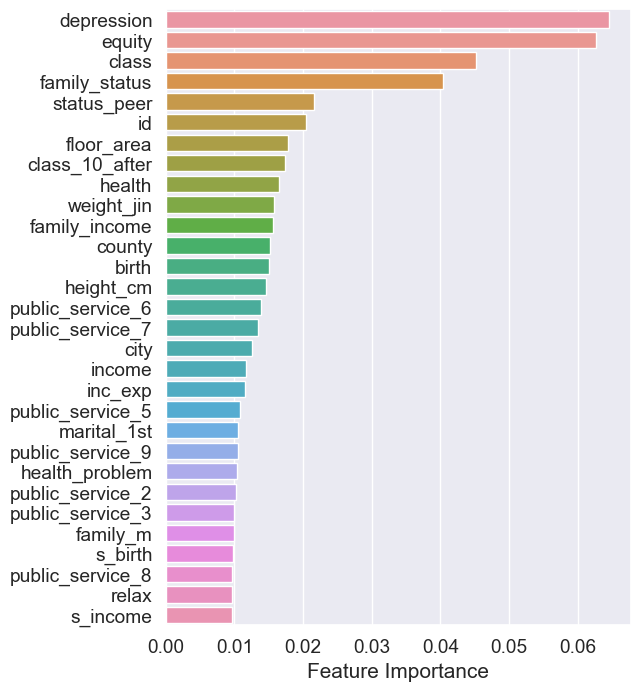

In [91]:
plot_feature_importances(RandomForestRegressor(n_jobs=-1, random_state=2023, max_features=0.4, n_estimators=500, verbose=1))

From the plot above, we see that `depression` and `equity` are quite high on the feature importance. So if we go back to the company scenario, the management might want to consider implementing policies on employee's mental health, as well as improving equality in the workplace. This is an example of how one might use such machine learning model in real life more than just predicting the target variable.

## XGBoost

In [58]:
# XGboost
import xgboost

def XGBoost(xgb=xgboost.XGBRegressor()):
    kf = KFold(10, shuffle=True, random_state=2023)
    mse = []
            
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = xgb.fit(x_train, y_train).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    print("Mean MSE: {}".format(np.mean(mse)))

In [59]:
#XGBoost(xgboost.XGBRegressor(tree_method='gpu_hist', gpu_id=0))
# It turns out I don't have the version of XGboost compiled with GPU support.

In [60]:
XGBoost()

Mean MSE: 0.52998644366365


In [61]:
XGBoost(xgboost.XGBRegressor(eta=0.2))

Mean MSE: 0.4934885809862658


In [62]:
XGBoost(xgboost.XGBRegressor(eta=0.1))

Mean MSE: 0.4781038555026164


In [63]:
XGBoost(xgboost.XGBRegressor(booster='dart'))

Mean MSE: 0.5299864437795633


In [64]:
XGBoost(xgboost.XGBRegressor(objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.52998644366365


In [65]:
XGBoost(xgboost.XGBRegressor(eta=0.1,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4781038555026164


In [66]:
XGBoost(xgboost.XGBRegressor(eta=0.08,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4710876327901189


In [67]:
XGBoost(xgboost.XGBRegressor(eta=0.05,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.47409749564442594


In [68]:
XGBoost(xgboost.XGBRegressor(eta=0.06,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4721528666699755


In [69]:
XGBoost(xgboost.XGBRegressor(eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4706418286849531


In [70]:
XGBoost(xgboost.XGBRegressor(max_depth=5, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.46947175917196937


In [71]:
XGBoost(xgboost.XGBRegressor(max_depth=6, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4706418286849531


In [72]:
XGBoost(xgboost.XGBRegressor(max_depth=7, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.47533323865012134


In [73]:
XGBoost(xgboost.XGBRegressor(max_depth=4, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.46962394673077473


In [74]:
XGBoost(xgboost.XGBRegressor(max_depth=3, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.47083854899924316


In [75]:
XGBoost(xgboost.XGBRegressor(n_estimators=200, max_depth=5, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4687669119719352


In [76]:
XGBoost(xgboost.XGBRegressor(n_estimators=300, max_depth=5, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.4712146227586487


In [77]:
XGBoost(xgboost.XGBRegressor(n_estimators=150, max_depth=5, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

Mean MSE: 0.468612631374996


Next I wanted to experiment with a Gradient Boosting model, so XGBoost naturally comes to mind. After trying some parameters, I was able to get a mean MSE of $0.4686$.

Looking at the feature importance plot, we can see similar trend in the top important features.

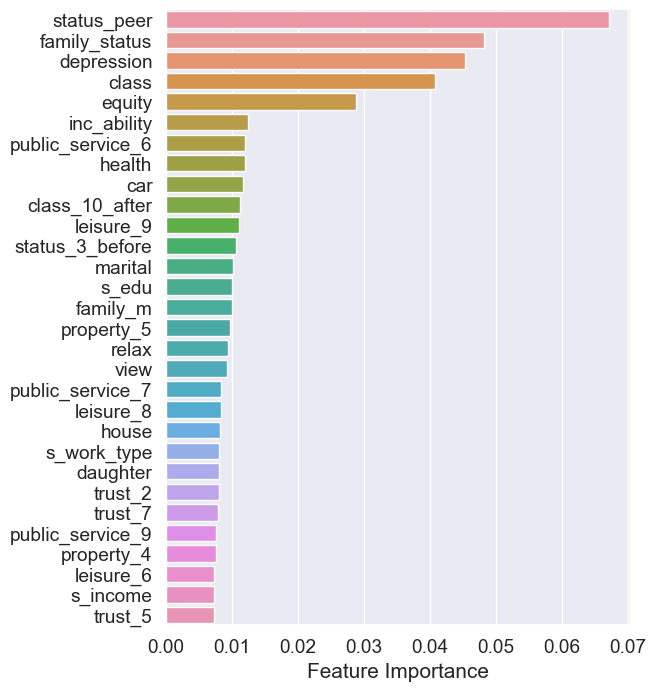

In [92]:
plot_feature_importances(xgboost.XGBRegressor(n_estimators=150, max_depth=5, eta=0.07,objective='reg:squarederror', eval_metric='rmse'))

## CatBoost

I wanted to try another Boosting model, so I found CatBoost quite promising to try. CatBoost is also an implementation of Gradient Boosting, but it is more refined at processing categorical features, which make up a significant portion of the data set we use in this project.

In [93]:
# Catboost
import catboost

# Use GPU acceleration by default
def CatBoost(model = catboost.CatBoostRegressor(task_type="GPU", devices='0:1')):
    kf = KFold(10, shuffle=True, random_state=2023)
    mse = []
            
    for train, test in kf.split(x):
        x_train = x.iloc[train]
        y_train = y.iloc[train]
        x_test = x.iloc[test]
        y_test = y.iloc[test]
        
        pred = model.fit(x_train, y_train, verbose=False).predict(x_test)
        mse.append(mean_squared_error(pred, y_test))
    
    print("Mean MSE: {}".format(np.mean(mse)))
    
    return model


In [94]:
cb = CatBoost()

Mean MSE: 0.4655696694939982


In [95]:
cb.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 6,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 

In [97]:
cb2 = CatBoost(catboost.CatBoostRegressor(depth=5, task_type="GPU", devices='0:1'))

Mean MSE: 0.46336106998293863


In [98]:
cb2.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 5,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 

In [99]:
cb3 = CatBoost(catboost.CatBoostRegressor(learning_rate=0.04, depth=5, task_type="GPU", devices='0:1'))

Mean MSE: 0.46184841500429163


In [100]:
cb3.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 5,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 

In [101]:
cb4 = CatBoost(catboost.CatBoostRegressor(learning_rate=0.03, depth=5, task_type="GPU", devices='0:1'))
cb4.get_all_params()

Mean MSE: 0.46006350701669413


{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 5,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 

In [104]:
cb5 = CatBoost(catboost.CatBoostRegressor(learning_rate=0.02, depth=5, task_type="GPU", devices='0:1'))
cb5.get_all_params()

Mean MSE: 0.46022940622136826


{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'fold_permutation_block': 64,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Ordered',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'random_seed': 0,
 'depth': 5,
 'has_time': False,
 'fold_len_multiplier': 2,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'FeatureParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_class_weights': 

0:	learn: 0.8150994	total: 23.9ms	remaining: 23.9s
1:	learn: 0.8117215	total: 52.4ms	remaining: 26.1s
2:	learn: 0.8085545	total: 76ms	remaining: 25.3s
3:	learn: 0.8053891	total: 104ms	remaining: 25.9s
4:	learn: 0.8022665	total: 121ms	remaining: 24.1s
5:	learn: 0.7992837	total: 138ms	remaining: 22.9s
6:	learn: 0.7964078	total: 154ms	remaining: 21.8s
7:	learn: 0.7936778	total: 169ms	remaining: 21s
8:	learn: 0.7909227	total: 186ms	remaining: 20.5s
9:	learn: 0.7883624	total: 202ms	remaining: 20s
10:	learn: 0.7859449	total: 220ms	remaining: 19.7s
11:	learn: 0.7836973	total: 237ms	remaining: 19.5s
12:	learn: 0.7813074	total: 256ms	remaining: 19.4s
13:	learn: 0.7790175	total: 273ms	remaining: 19.2s
14:	learn: 0.7768886	total: 292ms	remaining: 19.2s
15:	learn: 0.7745780	total: 315ms	remaining: 19.4s
16:	learn: 0.7724497	total: 338ms	remaining: 19.6s
17:	learn: 0.7703782	total: 363ms	remaining: 19.8s
18:	learn: 0.7683349	total: 386ms	remaining: 19.9s
19:	learn: 0.7662994	total: 408ms	remaining:

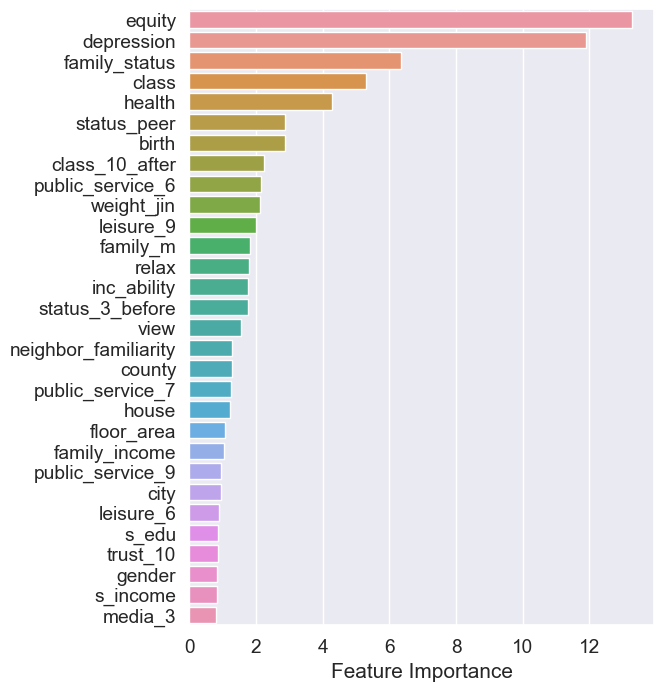

In [108]:
cb_feature_importance = plot_feature_importances(cb5)

Despite using GPU accleration on a 3090, training CatBoost models can be very slow. So I decided not to perform a parameter search. Doing parameter search with catboost will take an enormous amount of time so I decided to just try different parameters one by one. 

Fortunately, even without further hyperparameter tuning, the mean MSE I got here is quite good. The default CatBoost model yields a mean MSE of $0.4656$, which is smaller than what I got with Random Forest and XGBoost. With a few attempts at varying the parameter, I was able to get the mean MSE down to $0.4601$.

From the feature importance plot, we can see a lot of resemblance of the Random Forest and XGBoost feature importance plots. `equity`,  `depression`, `family_status`, and `class` are in the top 5 most important features in all three plots.

# Discussion and Conclusion

Below is a summary of the best mean Mean Squared Error across the 10 folds achieved with each model:

|      **Model**      | **mean MSE (10 folds)** |
|:-------------------:|:-----------------------:|
| Logistic Regression |                  0.6791 |
| Decision Tree       |                  0.5396 |
| KNN                 |                  0.6517 |
| AdaBoost            |                  0.4994 |
| Random Forest       |                  0.4779 |
| XGBoost             |                  0.4686 |
| CatBoost            |              **0.4601** |

The best model performance I got was with CatBoost, yielding a mean MSE of $0.4601$. It was close to top 30 scores on the leaderboard of the competition, which also uses MSE as the evaluation metric.

KNN is probably not suited for this project, as the mean MSE is only marginally better than Logistic Regression. But still, all the models I trained performed better than the Logistic Regression model, which is often the most common model used in social science papers. 

In addition, the results I got this time was significantly better than my previous attempt, in which the best MSE was around $0.6$. 

### Future Work

If I were to further optimize the model performance, I would go with Random Forest, XGBoost, or CatBoost. 

Random Forest offers a lot of flexibility and performance for its resource requirement, which makes it possible to perform larger-scaled hyperparemeter tuning. 

For XGBoost, I wasn't able to find XGBoost compiled with GPU support on conda, so it would be interesting to do more hyperparameter tuning using GPU. As a matter of fact, XGBoost runs quite fast even with CPU. 

CatBoost has the best result in this project, but it takes very long to train even with GPU. Anyhow, it also has lots of parameters available for tuning and it would be quite interesting to see if it's possible to achieve even better results.

Since we only covered SVM in the last week, I didn't get to experiment with SVM in this project. Also I was not sure if SVM would work well for a data set with this many features. But it would still be interesting to apply SVM to get better understanding of it.

Personally I think neural network would be great for this type of project. I am looking forward to the third course of the specialization and hopefully I can revisit this project after that.

### Conclusion

Most importantly, I demostrated in this project that I was able to apply Decision Tree, KNN, AdaBoost, Random Forest, and Gradient Boosting models in a real world problem. And for each model, I was able to perform parameter tuning to achieve better results.